<a href="https://colab.research.google.com/github/alessandronicolini/IncrementalLearning/blob/main/Project_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

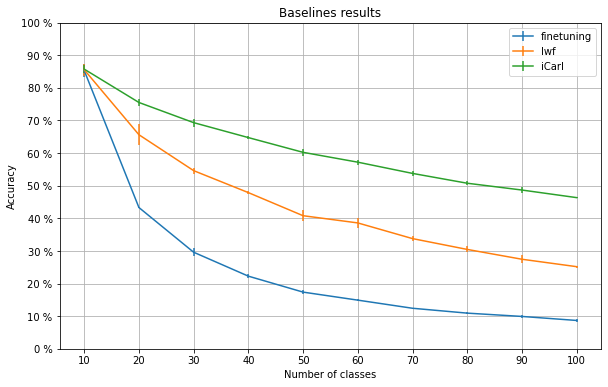

In [58]:
import numpy as np
import matplotlib.pyplot as plt
# BASELINES
# seed 203, 981, 404
# TODO rifare il joint training
size_param = 6
joint_training = [[84.82, 80.52, 76.46, 76.43, 74.41, 73.28, 72.16, 69.57, 68.77, 68.33]]

finetuning = np.array([[82.6, 43.30, 30.27, 22.70, 17.10, 15.43, 12.59, 10.60, 9.50, 8.95],
                       [86.70, 43.60, 30.63, 21.52, 18.08, 14.88, 12.46, 11.09, 9.79, 8.18],
                       [86.70, 43.05, 27.93, 22.60, 16.96, 14.45, 12.24, 11.12, 10.48, 8.94]], dtype=float)

lwf = np.array([[83, 64.4, 53.97, 47.42, 39.54, 38.93, 34.21, 30.1, 26.02, 24.8],
                [86.2, 69.95, 55.93, 48.57, 43.22, 40.28, 34.43, 31.71, 28.95, 25.65],
                [87.5, 62.55, 53.97, 47.67, 39.66, 36.57, 32.72, 29.6,27.4, 25.09]], dtype=float)

iCarl = np.array([[84.04, 74.22, 68.14, 63.96, 58.93, 56.98, 53.57, 50.37, 47.52, 46.64],
                  [86.38, 76.46, 70.96, 64.99, 61.3, 58.24, 54.66, 51.69, 49.51, 46.05],
                  [86.83, 75.89, 68.92, 65.32, 60.48, 56.44, 53.1, 50.23, 49, 46.36]], dtype=float)

classes = [i*10 for i in range(1, 11)]

fig, ax = plt.subplots(figsize=(1.618*size_param, size_param))
for values, method_name in zip([finetuning, lwf, iCarl], ['finetuning', 'lwf', 'iCarl']):
  means = values.mean(axis=0)
  errs = values.std(axis=0)

  ax.errorbar(classes, means, yerr=errs, label=method_name)

ax.set(xticks=classes,
       xlabel='Number of classes',
       yticks=[i*10 for i in range(11)],
       yticklabels=[str(i*10)+' %' for i in range(11)],
       ylabel='Accuracy',
       title='Baselines results')
ax.legend()
ax.grid()
plt.savefig('baselines_report.png')
plt.show()



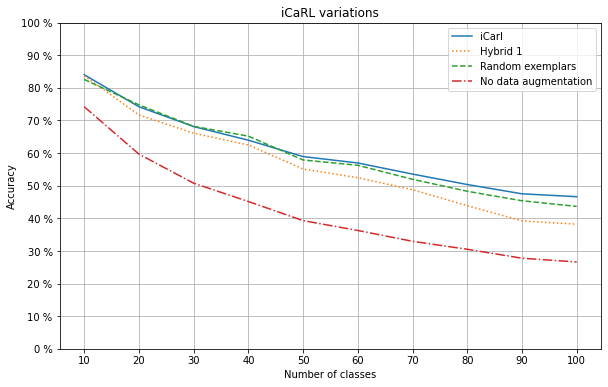

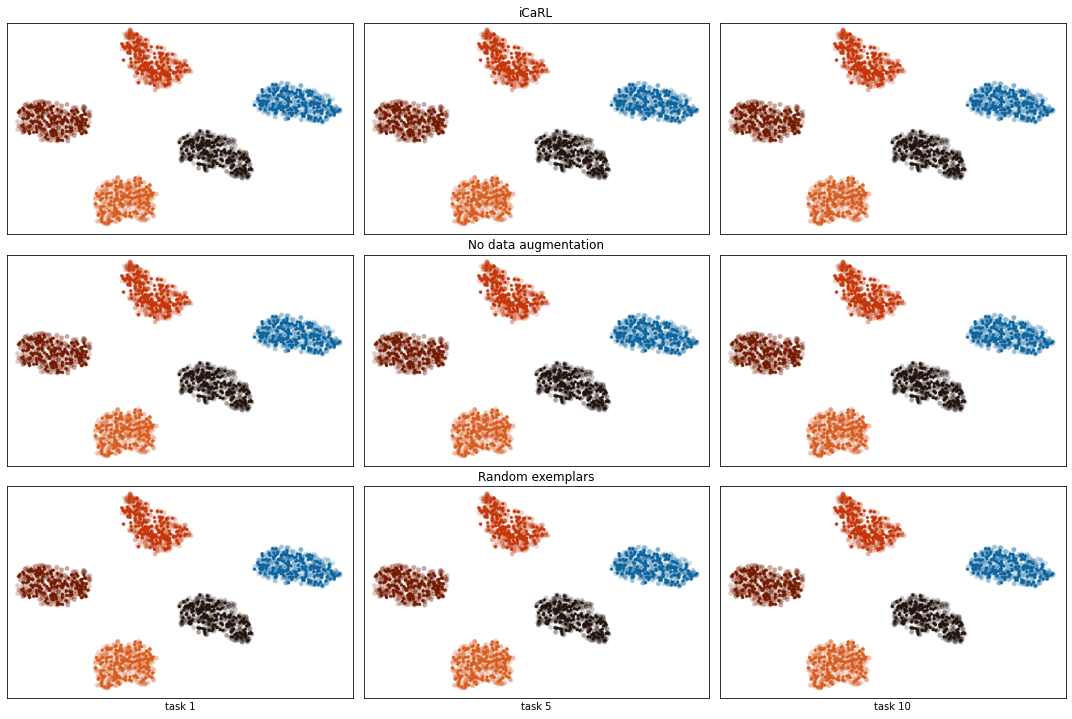

In [91]:
# ICARL DIFFERENT CONFIGURATIONS SEED 203
size_param = 6

ic = np.array([84.04, 74.22, 68.14, 63.96, 58.93, 56.98, 53.57, 50.37, 47.52, 46.64], dtype=float)
icFc =  np.array([83.7,71.7,66.1,62.5,55.12,52.449,48.78,43.9,39.211,38.2], dtype=float)
icRndEx = np.array([82.59, 74.79, 68.21, 65.20, 57.89, 56.27, 51.97, 48.30, 45.39, 43.66], dtype=float)
icNoDa = np.array([74.22, 59.69, 50.78, 45.16, 39.30, 36.28, 32.96, 30.51, 27.78, 26.62], dtype=float)

fig, ax = plt.subplots(figsize=(1.618*size_param, size_param))
classes = [i*10 for i in range(1, 11)]
conf_names = ['iCarl', 'Hybrid 1', 'Random exemplars', 'No data augmentation']
configurations = [ic, icFc, icRndEx, icNoDa]
linestyles = ['solid', 'dotted', 'dashed', 'dashdot']

for values, conf_name, l_style in zip(configurations, conf_names, linestyles):
  ax.plot(classes, values, label=conf_name, linestyle=l_style)

ax.set(xticks=classes,
       xlabel='Number of classes',
       yticks=[i*10 for i in range(11)],
       yticklabels=[str(i*10)+' %' for i in range(11)],
       ylabel='Accuracy',
       title='iCaRL variations')

ax.legend()
ax.grid()
plt.savefig('iCaRL_variations_report.png')
plt.show()

# TSNE for icarl normale, no data augmentation e random exemplars
import matplotlib.image as mpimg
ylabels = ['iCaRL', 'No data augmentation', 'Random exemplars']
xlabels = ['task 1', 'task 5', 'task 10']

fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(15,10), sharex=True)

# print images
for i in range(axis.shape[0]):
  for j in range(axis.shape[1]):
    axis[i][j].tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
    axis[i][j].imshow(mpimg.imread('iCarlNoDA_203_tsne_0.png'))

# print axis names
for i, (x_label, y_label) in enumerate(zip(xlabels, ylabels)):
  axis[i][1].set(title=y_label)
  axis[2][i].set(xlabel=x_label)
plt.tight_layout()

plt.savefig('iCaRL_variations_tsne_report.png')
plt.show()


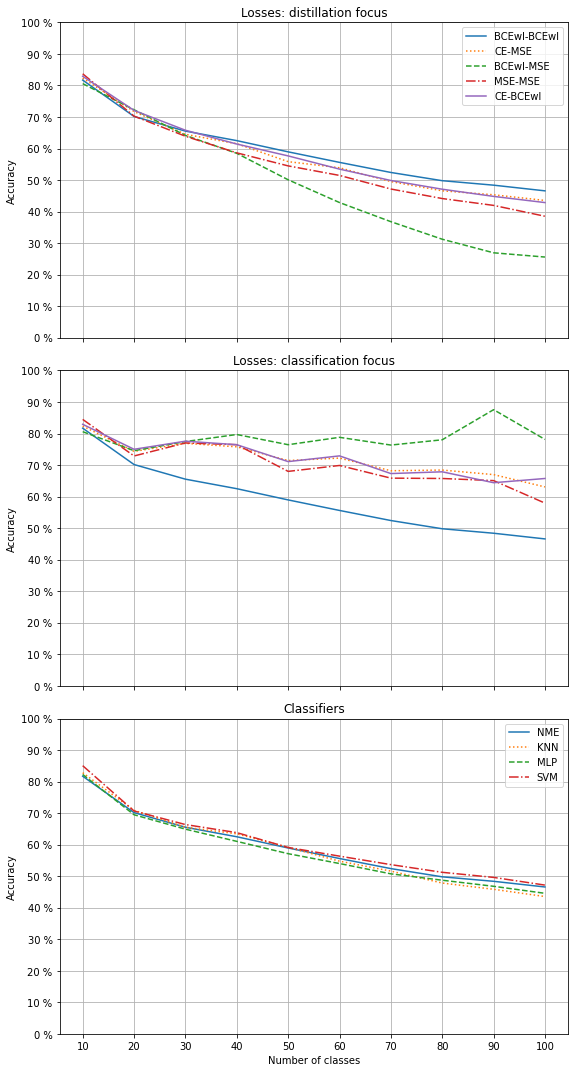

In [56]:
# ABLATION STUDIES seed 7
ic = np.array([81.70,70.16, 65.52, 62.5, 58.94, 55.60, 52.40, 49.79, 48.37, 46.57], dtype=float)

# LOSSES classification_distillation
bce_bce = {'tc':ic,
           'ta':ic}
ce_mse = {'tc':np.array([82.36, 71.72, 64.504, 61.517, 55.829, 53.889, 49.508, 46.585, 45.323, 43.529], dtype=float),
          'ta':np.array([82.36, 74.33, 76.897, 75.781, 71.428, 72.209, 68.192, 68.415, 66.964, 63.058], dtype=float)}
bce_mse = {'tc':np.array([80.58, 72.29, 64.164, 58.467, 50.08, 42.86, 36.791, 31.224, 26.919, 25.57], dtype=float),
          'ta':np.array([80.58, 74.553, 77.455, 79.687, 76.451, 78.794, 76.339, 78.013, 87.566, 78.125], dtype=float)}
mse_mse = {'tc':np.array([83.70, 70.27, 63.897, 58.619, 54.487, 51.462, 47.149, 44.128, 41.953, 38.511], dtype=float),
          'ta':np.array([84.48, 72.879, 77.008, 76.458, 67.987,69.866, 65.848, 65.736, 65.066, 57.924], dtype=float)}
ce_bce = {'tc':np.array([82.924,72.083,65.794,61.416,57.652,53.464,49.855,47.089,44.81,42.848], dtype=float),
          'ta':np.array([82.924,75,77.566,76.45,71.093,72.908,67.299,67.855,64.397,65.736], dtype=float)}

loss_names = ['BCEwl-BCEwl','CE-MSE', 'BCEwl-MSE', 'MSE-MSE', 'CE-BCEwl']
values_losses = [bce_bce, ce_mse, bce_mse, mse_mse, ce_bce]


# CLASSIFIERS
knn = np.array([82.81, 70.885, 65.523, 63.432, 59.134, 54.755, 51.605, 47.82, 45.837, 43.539], dtype=float)
mlp = np.array([82.254, 69.479, 64.911, 61.038, 57.131, 54.008, 50.737, 48.715, 46.786, 44.561], dtype=float)
svm = np.array([85.044, 70.677, 66.372, 63.81, 59.114, 56.352, 53.66, 51.222, 49.609, 47.165], dtype=float)

clf_names = ['NME', 'KNN', 'MLP', 'SVM']
values_clfs = [ic, knn, mlp, svm]

# MAKE PLOTS
size_param = 5
yticklabels = [str(i*10)+' %' for i in range(11)]
yticks = [i*10 for i in range(11)]
classes = [i*10 for i in range(1, 11)]
linestyles = ['solid', 'dotted', 'dashed', 'dashdot', 'solid']

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(1.618*size_param, size_param*3), sharex=True)

for values, name, style in zip(values_losses, loss_names, linestyles):
  ax1.plot(classes, values['tc'], linestyle=style, label=name)
  ax2.plot(classes, values['ta'], linestyle=style, label=name)

for values, name, style in zip(values_clfs, clf_names, linestyles[:4]):
  ax3.plot(classes, values, linestyle=style, label=name)

ax1.legend()
ax3.legend()
ax1.grid()
ax2.grid()
ax3.grid()
ax1.set(xticks=classes,
        yticks=yticks,
        yticklabels=yticklabels,
        ylabel='Accuracy',
        title='Losses: distillation focus')
ax2.set(xticks=classes,
        yticks=yticks,
        yticklabels=yticklabels,
        ylabel='Accuracy',
        title='Losses: classification focus')
ax3.set(xticks=classes,
        xlabel='Number of classes',
        yticks=yticks,
        yticklabels=yticklabels,
        ylabel='Accuracy',
        title='Classifiers')
plt.tight_layout()
plt.savefig('ablation_studies_report.png')
plt.show()